KeyboardInterrupt: 

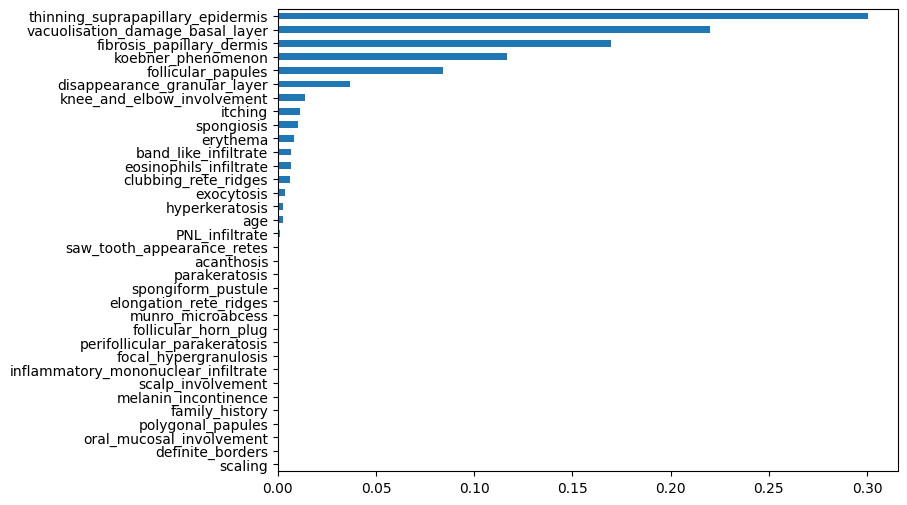

In [2]:
# fazendo gráfico para ver a importancia as colunas

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../dermatology_database_1.csv').dropna()

# ==============  OPÇÕES PARA VALORES DIFERENTES DE INT ===========

# print(df.dtypes) # mostra o tipo de cada col 

# # remover
# df_numerico = df.select_dtypes(exclude=['object'])

# # transformar em int

lb = LabelEncoder()
df["age"] = lb.fit_transform(df["age"])

# ================ fazendo gráfico para avaliar a importancia as colunas ======================

X = df.drop(columns=["class"])  # Substitua pelo nome da sua coluna alvo
Y = df["class"]

modelo = DecisionTreeClassifier().fit(X, Y)
importances = pd.Series(modelo.feature_importances_, index=X.columns)

importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.show()

# Definir um limite (exemplo: menos de 0.01 de importância)
limite = 0.01
colunas_baixa_importancia = importances[importances < limite].index.tolist()




In [ ]:

# retirnado colunas e baixa importancia

df = df.drop(columns=colunas_baixa_importancia)

X = df.drop(['class'], axis = 1)
Y = df['class']

In [ ]:
# uso do bagging com duiferentes modelos

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Criar modelos base para bagging
modelo_bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
modelo_bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
modelo_svm = SVC(probability=True)  # SVM não usa bagging direto, mas adicionamos ao ensemble depois

# Treinar modelos
modelo_bagging_tree.fit(X_train, y_train)
modelo_bagging_knn.fit(X_train, y_train)
modelo_svm.fit(X_train, y_train)

# Fazer previsões de cada modelo
pred_tree = modelo_bagging_tree.predict(X_test)
pred_knn = modelo_bagging_knn.predict(X_test)
pred_svm = modelo_svm.predict(X_test)

# Combinar previsões por votação (maioria)
final_pred = np.array([np.bincount([pred_tree[i], pred_knn[i], pred_svm[i]]).argmax() for i in range(len(y_test))])

# Avaliação
print(f"Acurácia do ensemble: {accuracy_score(y_test, final_pred):.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#  uso do voatiing para ver quais as melhores previsões automáticamente


from sklearn.ensemble import VotingClassifier

# Criar ensemble com votação
ensemble_model = VotingClassifier(estimators=[
    ('bagging_tree', modelo_bagging_tree),
    ('bagging_knn', modelo_bagging_knn),
    ('svm', modelo_svm)
], voting='hard')  # 'hard' para votação por maioria, 'soft' para média de probabilidades

# Treinar ensemble
ensemble_model.fit(X_train, y_train)

# Avaliação
print(f"Acurácia do ensemble: {ensemble_model.score(X_test, y_test):.4f}")
